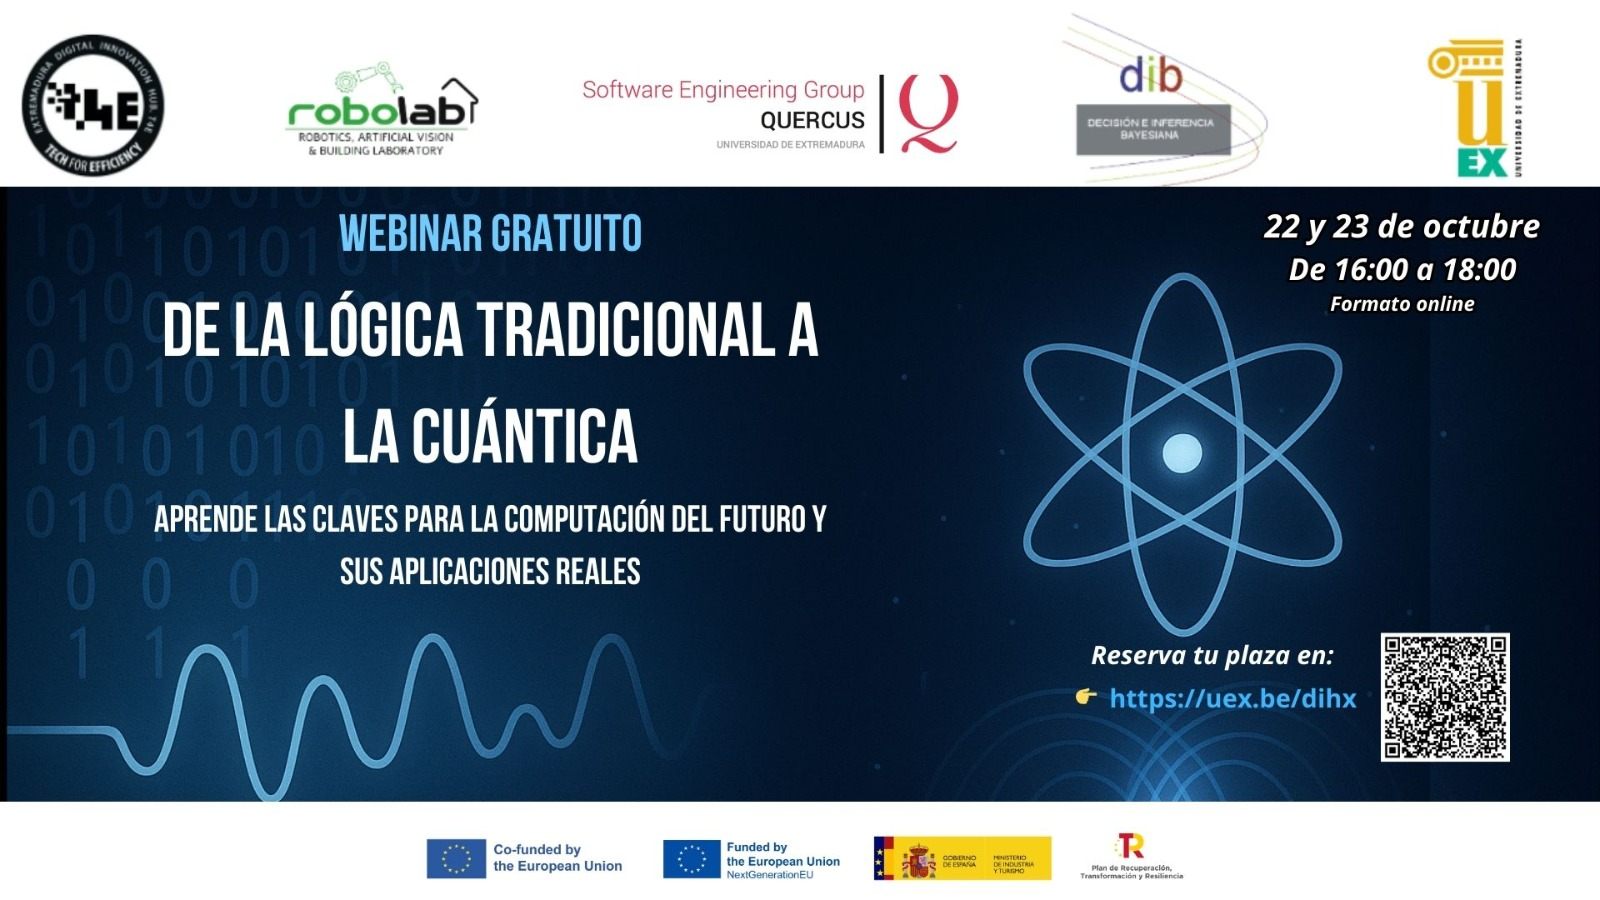

# Códigos de ejemplo Curso De la Lógica Tradicional a la Cuántica

Bienvenidos al laboratorio de código de ejemplo del curso del Digital Innovation Hub - De la Lógica Tradicional a la Cuántica.
El objetivo de este documento, es de servir de ejemplo para introducir la programación y ejecución de circuitos cuánticos en los ordenadores de IBM a través de su plataforma.

**Agradecimientos:**
*This project has received co-funding from the European Union’s Digital Europe Programme (DIGITAL) undergrantagreement Nº101083667-Tech4EfficiencyEDIH. Co-funded by the Ministry of Industry, Trade and Tourism of the Government of Spain, within the framework of the “Next Generation/PRTR” funds.However, the views and opinions expressed are solely those of the author(s) and do notnecessarily reflect those of the European Union or the Government of Spain.*

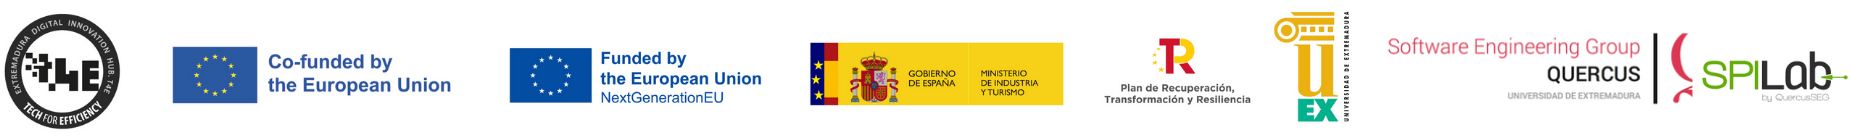

## Setup

Primero vamos a instalar las librerías necesarias para poder realizar la ejecución de las celdas de código


In [ ]:
!pip install qiskit[visualization] qiskit-ibm-runtime qiskit-aer qiskit_qasm3_import

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
#import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


---

## 1. Operadores de Pauli (Operadores de un Qubit)

**Explicación:** Explicación: Los operadores de Pauli (X, Y, Z e I) son matrices de 2x2 que representan operaciones cuánticas fundamentales de un solo qubit. En Qiskit, se pueden crear usando la clase Pauli (por ejemplo, Pauli('X') para el operador X). También puedes construir Paulis de múltiples qubits especificando caracteres para cada qubit (por ejemplo, 'XI' para la identidad en el qubit 0 y X en el qubit 1, siguiendo el orden de bits little-endian de Qiskit).

**Ejercicio 1:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un operador de Pauli de 3 qubits que represente `Z` en el qubit 2, `Y` en el qubit 1 e `I` (Identidad) en el qubit 0.
2. Imprime el operador.
3. Imprime su representación matricial correspondiente.

In [ ]:
# Your code here
pauli_op = Pauli('XYI')

print("Pauli Operator:")
print(pauli_op)

print("\nMatrix representation:")
print(pauli_op.to_matrix())

Pauli Operator:
XYI

Matrix representation:
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


---

## 2. Single-Qubit Gates and Phases

**Explanation:** Single-qubit gates like X, Y, Z, H, S, and T are basic operations on one qubit. S and T are phase gates. The S-gate adds a π/2 phase to the |1⟩ component of any quantum state, while the T-gate adds a π/4 phase to the |1⟩ component, leaving the |0⟩ component unchanged in both cases. These phase shifts are crucial for many quantum algorithms.

## 2. Puertas de un Qubit y Fases

**Explicación:** Las puertas de un solo qubit como X, Y, Z, H, S y T son operaciones básicas en un qubit. S y T son puertas de fase. La puerta S añade una fase de π/2 al componente |1⟩ de cualquier estado cuántico, mientras que la puerta T añade una fase de π/4 al componente |1⟩, dejando el componente |0⟩ inalterado en ambos casos. Estos cambios de fase son cruciales para muchos algoritmos cuánticos.

**Ejercicio 2:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito cuántico que contenga un qubit.
2. Pone el qubit en el estado |1⟩.
3. Añade una sola puerta al circuito que aplica un cambio de fase de π/4 al qubit.
4. Muestra una representación en notación de Dirac del vector de estado del circuito.

In [ ]:
# Your code here
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.t(0)
print(circuit.draw())
statevector = Statevector(circuit)
print(statevector.draw())

   ┌───┐┌───┐
q: ┤ X ├┤ T ├
   └───┘└───┘
Statevector([0.        +0.j        , 0.70710678+0.70710678j],
            dims=(2,))


---

## 3. Superposición y Rotaciones en la Esfera de Bloch

**Explicación:** Puertas como `RX`, `RY` y `RZ` realizan rotaciones alrededor de los ejes de la esfera de Bloch, creando estados de superposición. Una rotación por un ángulo θ alrededor del eje Y (`RY(θ)`) sobre un estado inicial |0⟩ produce la superposición cos(θ/2)|0⟩ + sin(θ/2)|1⟩. Las probabilidades de medir 0 o 1 son los cuadrados de estas amplitudes.

**Ejercicio 3:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito cuántico que contenga un qubit.
2. Aplica una única puerta al qubit 0 (inicialmente en estado |0⟩) para crear una superposición donde la probabilidad de medir |0⟩ sea aproximadamente 14.6% y la probabilidad de medir |1⟩ sea 85.4%.
3. Imprime las probabilidades.
4. Muestra una representación del vector de estado en la esfera de Bloch.

Probabilities
|0>: 0.147
|1>: 0.853


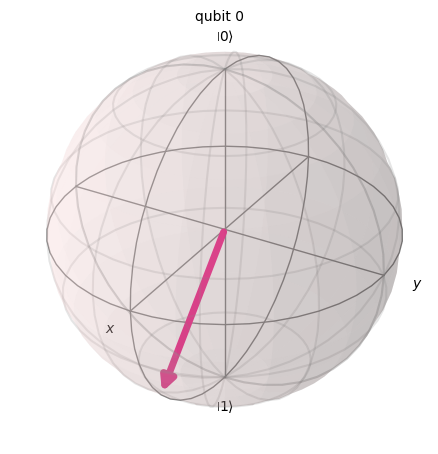

In [ ]:
# Your code here
calculated_theta = 2.356 # radians
circuit = QuantumCircuit(1)
circuit.ry(calculated_theta, 0)
state = Statevector.from_instruction(circuit)
probs = state.probabilities_dict()
print("Probabilities")
for state_str, prob in probs.items():
    print(f"|{state_str}>: {prob:.3f}")

plot_bloch_multivector(state)


---

## 4. Operaciones con múltiples Qubits y Entrelazamiento

**Explicación:** Las puertas de varios qubits como la CNOT (`qc.cx(control, target)`) crean entrelazamiento cuando se aplican a estados de superposición. Un estado entrelazado común es el estado de Bell |Φ+⟩ = 1/√2(|00⟩ + |11⟩), creado aplicando una puerta Hadamard a un qubit y luego una puerta CNOT. Recuerda el orden de los bits de Qiskit: el qubit 0 es el bit más a la derecha (menos significativo).

**Ejercicio 4:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito cuántico que contenga dos qubits.
2. Crea el estado de Bell |Φ+⟩ en el que el primer qubit (q0) es el qubit de control.
3. Dibuja el circuito cuántico usando matplotlib.
4. Imprime el vector de estado del circuito.

In [ ]:
# Your code here
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
print(circuit.draw())
state = Statevector.from_instruction(circuit)
print(state.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


---

## 5. Construcción y Dibujo de Circuitos Cuánticos

**Explicación:** La clase `QuantumCircuit` se usa para construir circuitos. El método `draw()` proporciona visualizaciones en formatos como `'text'`, `'mpl'` y `'latex'`. Puedes personalizar el dibujo con parámetros como `reverse_bits` para invertir el orden de los qubits.

**Ejercicio 5:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un estado GHZ de 3 qubits.
2. Dibuja el circuito con el orden de los qubits invertido en el diagrama (q2 arriba, q0 abajo).

In [ ]:
# Your code here
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.draw(reverse_bits=True)

┌───┐
q_2: ──────────┤ X ├
          ┌───┐└─┬─┘
q_1: ─────┤ X ├──■──
     ┌───┐└─┬─┘     
q_0: ┤ H ├──■───────
     └───┘

---

## 6. Circuitos Dinámicos y Flujo de Control Clásico

**Explicación:** Qiskit soporta circuitos dinámicos donde las operaciones pueden estar condicionadas a los resultados de mediciones clásicas. El gestor de contexto `if_test()` se puede usar para crear bloques condicionales donde las operaciones se ejecutan basándose en valores de bits clásicos. Esto permite una poderosa realimentación clásica en tus programas cuánticos.

**Ejercicio 6:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito cuántico que contenga dos qubits y al menos un bit clásico.
2. Añade una puerta Hadamard al qubit menos significativo.
3. Aplica una puerta X al qubit 1 *solo si* una medición del qubit 0 produce el resultado `1`. Usa el gestor de contexto `if_test()` con la tupla de condición apropiada.
4. Dibuja el circuito usando matplotlib.

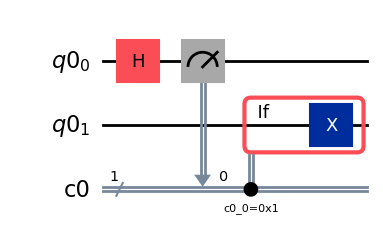

In [ ]:
# Your code here
from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(0)
result = circuit.measure(qr[0], cr[0])
with circuit.if_test((cr[0], 1)):
    circuit.x(qr[1])

circuit.draw('mpl')

---

## 7. Visualización de Estados Cuánticos y Resultados

**Explicación:** Qiskit ofrece varias funciones para visualizar resultados. `plot_histogram(counts)` se utiliza para mostrar los resultados de medición de una simulación o ejecución en un dispositivo real. Puedes ordenar los resultados para un análisis más sencillo, por ejemplo, por la frecuencia de los resultados.

**Ejercicio 7:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito cuántico que contenga el estado de Bell |Φ+⟩.
2. Mide los resultados en los cables clásicos.
3. Ejecuta el circuito usando el `AerSimulator`.
4. Obtiene los conteos de medición.
5. Grafica un histograma con las barras ordenadas del resultado más común al menos común.

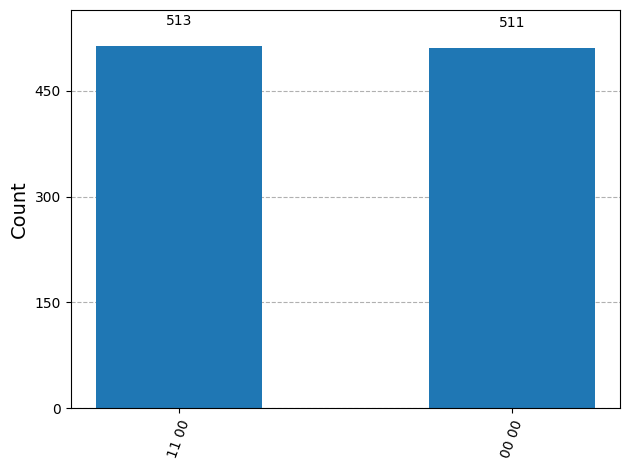

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, transpile
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(0)
circuit.cx(0,1)
circuit.measure_all()

simulator = AerSimulator()
transpiled_circuit = transpile(circuit, simulator)
counts = simulator.run(transpiled_circuit).result().get_counts()
plot_histogram(counts, sort='desc')


---

## 8. Circuitos Cuánticos Parametrizados

**Explicación:** Qiskit permite circuitos con parámetros simbólicos usando la clase `Parameter`. Estos parámetros actúan como marcadores de posición que se pueden vincular a valores numéricos específicos más adelante usando el método `assign_parameters()`. Esto es fundamental para algoritmos variacionales como VQE y QAOA.

**Ejercicio 8:**
Escribe código que realice la siguiente funcionalidad:
1. Crea una instancia de `Parameter` para representar un parámetro llamado `theta`.
2. Crea un circuito cuántico `qc` que contenga un qubit.
3. Añade una puerta RX con el parámetro `theta` al cable del qubit.
4. Dibuja el circuito `qc`.
5. Crea un nuevo circuito `bound_qc` vinculando el parámetro `theta` al valor `π/2`.
6. Dibuja el circuito `bound_qc`.

In [ ]:
# Your code here
theta = np.pi/2
parameter = Parameter('theta')
qc = QuantumCircuit(1)
qc.rx(parameter, 0)
print(qc.draw())
bound_qc = qc.assign_parameters({parameter: theta})
print(bound_qc.draw())


   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘
   ┌─────────┐
q: ┤ Rx(π/2) ├
   └─────────┘


---

## 9. Transpilación y Optimización de Circuitos

**Explicación:** La transpilación adapta un circuito cuántico a las restricciones de un dispositivo cuántico específico, incluyendo sus puertas base y conectividad de qubits. La función `generate_preset_pass_manager()` crea un gestor de pases de transpilación con configuraciones preestablecidas. Tiene varias configuraciones de `optimization_level` (0-3), donde los niveles más altos aplican técnicas de optimización más avanzadas para reducir la profundidad del circuito y el número de puertas, a costa de un mayor tiempo de compilación.

**Ejercicio 9:**
Escribe código que realice la siguiente funcionalidad:
1. Crea un circuito GHZ de 3 qubits.
2. Transpila el circuito para el backend `FakeVigoV2`, usando el nivel más alto de optimización (nivel 3).
3. Imprime la profundidad del circuito original.
4. Imprime la profundidad del circuito transpilado.
5. Dibuja el circuito transpilado.

In [ ]:
personal_pass_manager = generate_preset_pass_manager(
    backend=FakeVigoV2(),
    optimization_level=3
)
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
transpiled_circuit = personal_pass_manager.run(circuit)
print(f"Original circuit depth: {circuit.depth()}")
print(f"Transpiled circuit depth: {transpiled_circuit.depth()}")
transpiled_circuit.draw()

Original circuit depth: 3
Transpiled circuit depth: 5


global phase: π/4
                                     ┌───┐     
q_1 -> 1 ────────────────────────────┤ X ├──■──
         ┌─────────┐┌────┐┌─────────┐└─┬─┘  │  
q_0 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────┼──
         └─────────┘└────┘└─────────┘     ┌─┴─┐
q_2 -> 3 ─────────────────────────────────┤ X ├
                                          └───┘

---

## 11. Quantum Primitives (Sampler and Estimator)

**Explicación:** Los primitivos son interfaces de alto nivel para tareas cuánticas comunes. El **Sampler** y el **Estimator** son dos primitivos clave que sirven para diferentes propósitos al trabajar con circuitos cuánticos. Abstraen los detalles de la ejecución y la mitigación de errores, facilitando la extracción de información significativa de las computaciones cuánticas.

**Ejercicio 11:** Esta es una pregunta conceptual. En la celda de markdown a continuación, describe la diferencia fundamental entre los primitivos Sampler y Estimator en una sola oración.

The foundamental difference between the Sampler and the Estimator is that the first one is used for obtaining the probability distribution of measurement outcomes (or bitstrings) and the second one for calculating the expected values (or expectation values) of observables.

---

## 19. Ejecución en hardware real de IBM Quantum

In [ ]:
your_api_key = "_LEVnDxc2z9bti30xsDo6QlDw3nFxtyUN_lwZQ5dQExm"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/82524ba1afbd4edb92b1fdbecc4c33ba:197a763e-404f-4b7d-b32b-857986d3cb62::"

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="fallfest-2025",
)

# Check that the account has been saved properly
service = QiskitRuntimeService(name="fallfest-2025")
print(service.saved_accounts())

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

service = QiskitRuntimeService(name="fallfest-2025")
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')

management.get:WARNING:2025-10-21 09:22:21,343: Loading saved account: fallfest-2025
management.get:WARNING:2025-10-21 09:22:23,454: Loading saved account: fallfest-2025


{'fallfest-2025': {'channel': 'ibm_quantum_platform', 'url': 'https://cloud.ibm.com', 'token': '_LEVnDxc2z9bti30xsDo6QlDw3nFxtyUN_lwZQ5dQExm', 'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/82524ba1afbd4edb92b1fdbecc4c33ba:197a763e-404f-4b7d-b32b-857986d3cb62::', 'verify': True, 'private_endpoint': False}}
Measurement counts: {'00': 2334, '11': 1982, '10': 384, '01': 300}
